In [1]:
%matplotlib ipympl
#%matplotlib widget
#%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import bison
import pyobs

# plt.rcParams.update({
#     "text.usetex"      : True,
#     "font.family"      : "Helvetica",
#     "mathtext.fontset" : "dejavuserif"
# })
plt.rcParams.update({
    "axes.axisbelow"   : True,
})

In [2]:
data = bison.load("Cnfgs_measurement/WF-slices_beta617_seed123456.dat")
L1, L2, L3, T = data['Lattice']
V         =  L1 * L2 * L3 * T
eps_WF    =  data['epsilon WF']
WF_evol   =  data['WF evolutions from t = 0']
WF_step   =  data['WF measure step']
Nwf       =  WF_evol // WF_step + 1
t_WF      = np.array([eps_WF * WF_step * i for i in range(Nwf)])

[Bison] : Reading file Cnfgs_measurement/WF-slices_beta617_seed123456.dat
[Bison] : File created by gmorandi at ampere on Tue Dec 19 00:02:04 2023
[Bison] : Read 147.311 MB at 534.365 MB/s


In [3]:
Corrs_Clov = []
Corrs_Plaq = []
for t0 in range(Nwf):
    Corrs_Clov.append(pyobs.load(f'PyObs/Corr_EClov_tWF{t_WF[t0]:.2f}.pyobs'))
    Corrs_Plaq.append(pyobs.load(f'PyObs/Corr_EPlaq_tWF{t_WF[t0]:.2f}.pyobs'))

[Bison] : Reading file PyObs/Corr_EClov_tWF0.00.pyobs
[Bison] : File created by gmorandi at ampere on Sun Feb 11 10:52:21 2024
[Bison] : Read 0.765433 MB at 129.261 MB/s
[Bison] : Reading file PyObs/Corr_EPlaq_tWF0.00.pyobs
[Bison] : File created by gmorandi at ampere on Sun Feb 11 10:52:21 2024
[Bison] : Read 0.765429 MB at 159.89 MB/s
[Bison] : Reading file PyObs/Corr_EClov_tWF0.10.pyobs
[Bison] : File created by gmorandi at ampere on Sun Feb 11 10:52:22 2024
[Bison] : Read 0.765433 MB at 160.131 MB/s
[Bison] : Reading file PyObs/Corr_EPlaq_tWF0.10.pyobs
[Bison] : File created by gmorandi at ampere on Sun Feb 11 10:52:22 2024
[Bison] : Read 0.765429 MB at 157.568 MB/s
[Bison] : Reading file PyObs/Corr_EClov_tWF0.20.pyobs
[Bison] : File created by gmorandi at ampere on Sun Feb 11 10:52:22 2024
[Bison] : Read 0.765433 MB at 158.871 MB/s
[Bison] : Reading file PyObs/Corr_EPlaq_tWF0.20.pyobs
[Bison] : File created by gmorandi at ampere on Sun Feb 11 10:52:22 2024
[Bison] : Read 0.765429 

In [4]:
### Choose a specific Wilson flow time to to focus on ###
t0 = 4.50
i0 = int(t0 / (eps_WF * WF_step))

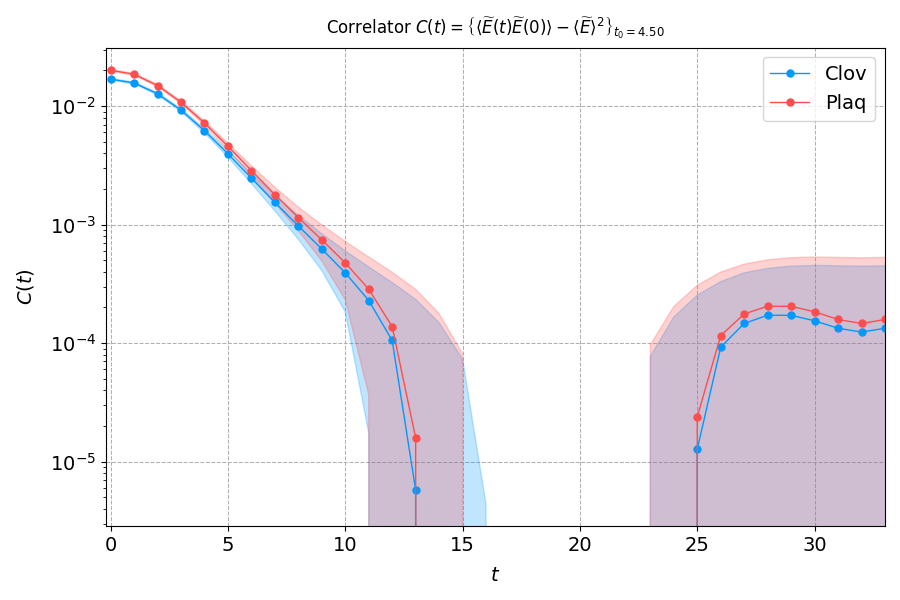

In [5]:
Ct_Clov, dCt_Clov = Corrs_Clov[i0].error()
Ct_Plaq, dCt_Plaq = Corrs_Plaq[i0].error()

fig, ax = plt.subplots(figsize=(9, 6))
plt.subplots_adjust(top    = 0.92)
plt.subplots_adjust(bottom = 0.12)
plt.subplots_adjust(left   = 0.15)
plt.subplots_adjust(right  = 0.95)

fsize = 14

ax.set_title(rf"Correlator $C(t) = \left \{{ \langle \widetilde{{E}}(t) \widetilde{{E}}(0) \rangle - \langle \widetilde{{E}} \rangle^2 \right \}}_{{t_0 = {t0:.2f}}}$", pad=10)
ax.set_ylabel(r"$C(t)$", labelpad=10, rotation=90, fontsize=fsize)
ax.set_xlabel(r'$t$', labelpad=8, fontsize=fsize)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlim([-0.2, T/2+1])
#plt.ylim([1e-2, 1e1])
ax.grid(linestyle = '--', linewidth = 0.75)
ax.set_yscale('log')

std = 1.0
ax.plot(np.arange(T), Ct_Clov, label=r'Clov', linestyle='-', marker='o' , markersize=5.0, color='#0099ff', linewidth=1.0)
ax.fill_between(np.arange(T), Ct_Clov + std * dCt_Clov, Ct_Clov - std * dCt_Clov, alpha=.25, color='#0099ff')
ax.plot(np.arange(T), Ct_Plaq, label=r'Plaq', linestyle='-', marker='o' , markersize=5.0, color='#ff4d4d', linewidth=1.0)
ax.fill_between(np.arange(T), Ct_Plaq + std * dCt_Plaq, Ct_Plaq - std * dCt_Plaq, alpha=.25, color='#ff4d4d')

ax.legend(loc='best', fontsize=fsize)

fig.tight_layout()

#plt.savefig("tau_int.pdf")

In [6]:
Tmin = 0
Tmax = T // 2
mass_Clov   = np.zeros(Tmax - Tmin)
dmass_Clov  = np.zeros(Tmax - Tmin)
mass_Plaq   = np.zeros(Tmax - Tmin)
dmass_Plaq  = np.zeros(Tmax - Tmin)

for t in range(Tmax - Tmin):
    eff_mass = pyobs.log(Corrs_Clov[i0][t] / Corrs_Clov[i0][t+1])
    mass_Clov[t], dmass_Clov[t] = eff_mass.error()
    eff_mass = pyobs.log(Corrs_Plaq[i0][t] / Corrs_Plaq[i0][t+1])
    mass_Plaq[t], dmass_Plaq[t] = eff_mass.error()

/knuthome/gmorandi/gabriele_py/lib64/python3.6/site-packages/pyobs/tensor/unary.py:26: RuntimeWarning: invalid value encountered in log
  new_mean = f(x.mean)


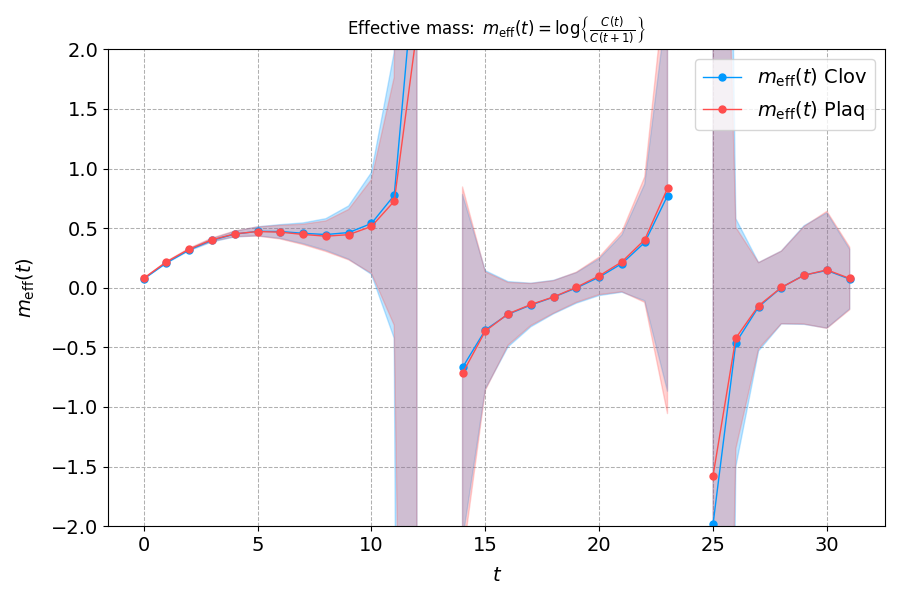

In [7]:
fig, ax = plt.subplots(figsize=(9, 6))
plt.subplots_adjust(top    = 0.92)
plt.subplots_adjust(bottom = 0.12)
plt.subplots_adjust(left   = 0.15)
plt.subplots_adjust(right  = 0.95)

fsize = 14

ax.set_title(rf"Effective mass: $\,m_\mathrm{{eff}}(t) = \log \left \{{ \frac{{C(t)}}{{C(t+1)}} \right \}}$", pad=10)
ax.set_ylabel(r"$m_{\mathrm{eff}}(t)$", labelpad=10, rotation=90, fontsize=fsize)
ax.set_xlabel(r'$t$', labelpad=8, fontsize=fsize)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.xlim([-0.2, 12])
plt.ylim([-2, 2])
ax.grid(linestyle = '--', linewidth = 0.75)

std = 1.0
ax.plot(np.arange(Tmin, Tmax), mass_Clov, label=r'$m_{\mathrm{eff}}(t)$ Clov', linestyle='-', marker='o' , markersize=5.0, color='#0099ff', linewidth=1.0)
ax.fill_between(np.arange(Tmin, Tmax), mass_Clov + std * dmass_Clov, mass_Clov - std * dmass_Clov, alpha=.25, color='#0099ff')
ax.plot(np.arange(Tmin, Tmax), mass_Plaq, label=r'$m_{\mathrm{eff}}(t)$ Plaq', linestyle='-', marker='o' , markersize=5.0, color='#ff4d4d', linewidth=1.0)
ax.fill_between(np.arange(Tmin, Tmax), mass_Plaq + std * dmass_Plaq, mass_Plaq - std * dmass_Plaq, alpha=.25, color='#ff4d4d')

ax.legend(loc='best', fontsize=fsize)

fig.tight_layout()

#plt.savefig("tau_int.pdf")

In [44]:
einfo = {'Ensemble A': pyobs.errinfo(W=11)}
np.array(Corrs_Clov[i0].covariance_matrix(errinfo=einfo)).shape

## Fits on $\langle \widetilde{E}(t) \widetilde{E}(0)  \rangle_\mathrm{Clov}$ and $\langle \widetilde{E}(t) \widetilde{E}(0)  \rangle_\mathrm{Plaq}$ 

In [8]:
##########################
### 2 independent fits ###
##########################
tmin = 6
tmax = 10
t = np.arange(tmin, tmax + 1)

# fit function #
# f  = lambda t, A0, A1, E0, E1: A0*np.exp(-t*E0) + A1*np.exp(-t*E1) 
# df = lambda t, A0, A1, E0, E1: [np.exp(-t*E0), np.exp(-t*E1), -t*A0*np.exp(-t*E0), -t*A1*np.exp(-t*E1)]
f  = lambda t, A0, E0: A0*np.exp(-t*E0) 
df = lambda t, A0, E0: [np.exp(-t*E0), -t*A0*np.exp(-t*E0)]

W_Clov = 1. / dCt_Clov[tmin:tmax+1]**2
W_Plaq = 1. / dCt_Plaq[tmin:tmax+1]**2

In [9]:
fit_Clov = pyobs.mfit(t, W_Clov, f, df, v='t')
fit_Plaq = pyobs.mfit(t, W_Plaq, f, df, v='t')

In [10]:
params_Clov = fit_Clov(Corrs_Clov[i0][tmin:tmax+1])
print(params_Clov)

chisquare = 0.00500063108917243
chiexp    = 0.17241792847065884 +- 0.026192163562987862
minimizer iterations = 55
minimizer status: Levenberg-Marquardt: converged 1.0e-06 per-cent tolerance on fun
mfit executed in 0.0371892 secs
0.039(19)	0.462(90)



In [11]:
params_Plaq = fit_Plaq(Corrs_Plaq[i0][tmin:tmax+1])
print(params_Plaq)

chisquare = 0.010075919561755136
chiexp    = 0.1661102834457081 +- 0.02523396349843436
minimizer iterations = 53
minimizer status: Levenberg-Marquardt: converged 1.0e-06 per-cent tolerance on fun
mfit executed in 0.023632 secs
0.043(20)	0.452(88)



In [12]:
####################
### Combined fit ###
####################
fit_2 = fit_Clov + fit_Plaq
params_2 = fit_2([Corrs_Clov[i0][tmin:tmax+1], Corrs_Plaq[i0][tmin:tmax+1]])
print(params_2)

chisquare = 2.0691648453144946
chiexp    = 0.3391177634914566 +- 0.03642789897510326
minimizer iterations = 55
minimizer status: Levenberg-Marquardt: converged 1.0e-06 per-cent tolerance on fun
mfit executed in 0.0683682 secs
0.041(20)	0.457(89)

